#Taller-1 Teoría de Señales - Bases de datos V1-Manual
# 19 de Abril de 2023

###*Integrantes:*
#####Daniel Steven Lozada - 1010148612
#####Federico Lopez - 1002576446
#####Santiago Erazo Mora - 1082658664

In [1]:
"""
      ---------------------------------------------------------------
Parameters
      ---------------------------------------------------------------
url -> Database hosting address
column_names -> Variables selected for measurement.
data -> Training data
X_train -> Training and testing variables
X_test -> Training and testing variables
Y_train -> Training and testing variables
Y_test -> Training and testing variables

Returns
      ---------------------------------------------------------------
test_error -> Returns the loss rate of the trained model.
output -> Input- Output relationship

"""

'\n      ---------------------------------------------------------------\nParameters\n      ---------------------------------------------------------------\nurl -> Database hosting address\ncolumn_names -> Variables selected for measurement.\ndata -> Training data\nX_train -> Training and testing variables\nX_test -> Training and testing variables\nY_train -> Training and testing variables\nY_test -> Training and testing variables\n\nReturns\n      ---------------------------------------------------------------\ntest_error -> Returns the loss rate of the trained model.\noutput -> Input- Output relationship\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt 
from sklearn.model_selection import train_test_split

#Funciones de activacion

In [3]:
#Funciones de activacion 
#Funcion sigmoid
def sigmoid(x, derivate=False):
    if derivate:
        return sigmoid(x)*(1-sigmoid(x))
    else:
      return 1/(1+np.exp(-x))

#Funcion relu
def relu(x, derivate=False):
    if derivate:
       x[x<=0]=0
       x[x>0]=1
       return x
    else:
      return np.maximum(0,x)

#Funcion solfmax
def softmax(x, derivate=False):
    if not derivate:
        exps = np.exp(x - np.max(x))
        return exps / np.sum(exps)
    else:
        s = softmax(x)
        return np.diagflat(s) - np.dot(s, s.T)

#Funcion Lucky_ReLu 
def lucky_relu(x, epsilon=0.1, derivate=False):
    if not derivate:
        r = np.random.uniform(size=x.shape)
        return np.maximum(x, x * epsilon * r)
    else:
        r = np.random.uniform(size=x.shape)
        dx = np.ones_like(x)
        dx[x < 0] = epsilon * r[x < 0]
        return dx
#Funcion Tangente Hiperbolica
def tanh(x, derivate=False):
    if derivate:
        return 1 - np.tanh(x) ** 2
    else:
        return np.tanh(x)

#Errores (MAE,MSE, HUBER LOSS)

In [4]:
#Errores 
#MSE 
def mse(y_true, y_pred, derivate=False):
    if derivate:
      return (y_pred-y_true)/y_true.shape[0]
    else:
      return np.mean((y_true-y_pred)**2)

#MAE 
def mae(y_true, y_pred, derivate=False):
    if derivate:
        return np.where(y_pred > y_true, 1, -1)
    else:
        return np.mean(np.abs(y_true - y_pred))

#Huber loss
def huber_loss(y_true, y_pred, delta=1.0, derivative=False):
    diff = np.abs(y_true - y_pred)
    if derivative:
        if diff <= delta:
            return y_pred - y_true
        else:
            return delta * np.sign(y_pred - y_true)
    else:
        if diff <= delta:
            loss = 0.5 * diff**2
        else:
            loss = delta * diff - 0.5 * delta**2
        return np.mean(loss)


#Entrenamiento

In [5]:
#Funcion de activacion manual
def train(X_data, Y_data, lr, params, training=True):
  #Propagacion hacia adelante 
  params['A0']=X_data
  params['Z1']=np.matmul(params['A0'],params['W1'])+params['b1']
  params['A1']=relu(params['Z1'])
  params['Z2']=np.matmul(params['A1'],params['W2'])+params['b2']
  params['A2']=relu(params['Z2'])
  params['Z3']=np.matmul(params['A2'],params['W3'])+params['b3']
  params['A3']=sigmoid(params['Z3'])

  output=params['A3']

  if training:
     #Backpropagation
     params['dZ3']=mse(Y_data, output, True)*sigmoid(params['A3'], True)
     params['dW3']=np.matmul(params['A2'].T,params['dZ3'])
     params['dZ2']=np.matmul(params['dZ3'],params['W3'].T)*relu(params['A2'],True)
     params['dW2']=np.matmul(params['A1'].T,params['dZ2']) 
     params['dZ1']=np.matmul(params['dZ2'],params['W2'].T)*relu(params['A1'],True)
     params['dW1']=np.matmul(params['A0'].T,params['dZ1'])

     #Gradient descent
     params['W3']=params['W3']-params['dW3']*lr 
     params['b3']=params['b3']-np.mean(params['dZ3'],axis=0,keepdims=True)*lr
     params['W2']=params['W2']-params['dW2']*lr 
     params['b2']=params['b2']-np.mean(params['dZ2'],axis=0,keepdims=True)*lr
     params['W1']=params['W1']-params['dW1']*lr 
     params['b1']=params['b1']-np.mean(params['dZ1'],axis=0,keepdims=True)*lr

  return output 



#Base de datos de una uci (heart-disease)

In [6]:
#Cargamos la base de datos
url="https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
colum_names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data=pd.read_csv(url,names=colum_names)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#Relacion entre los datos

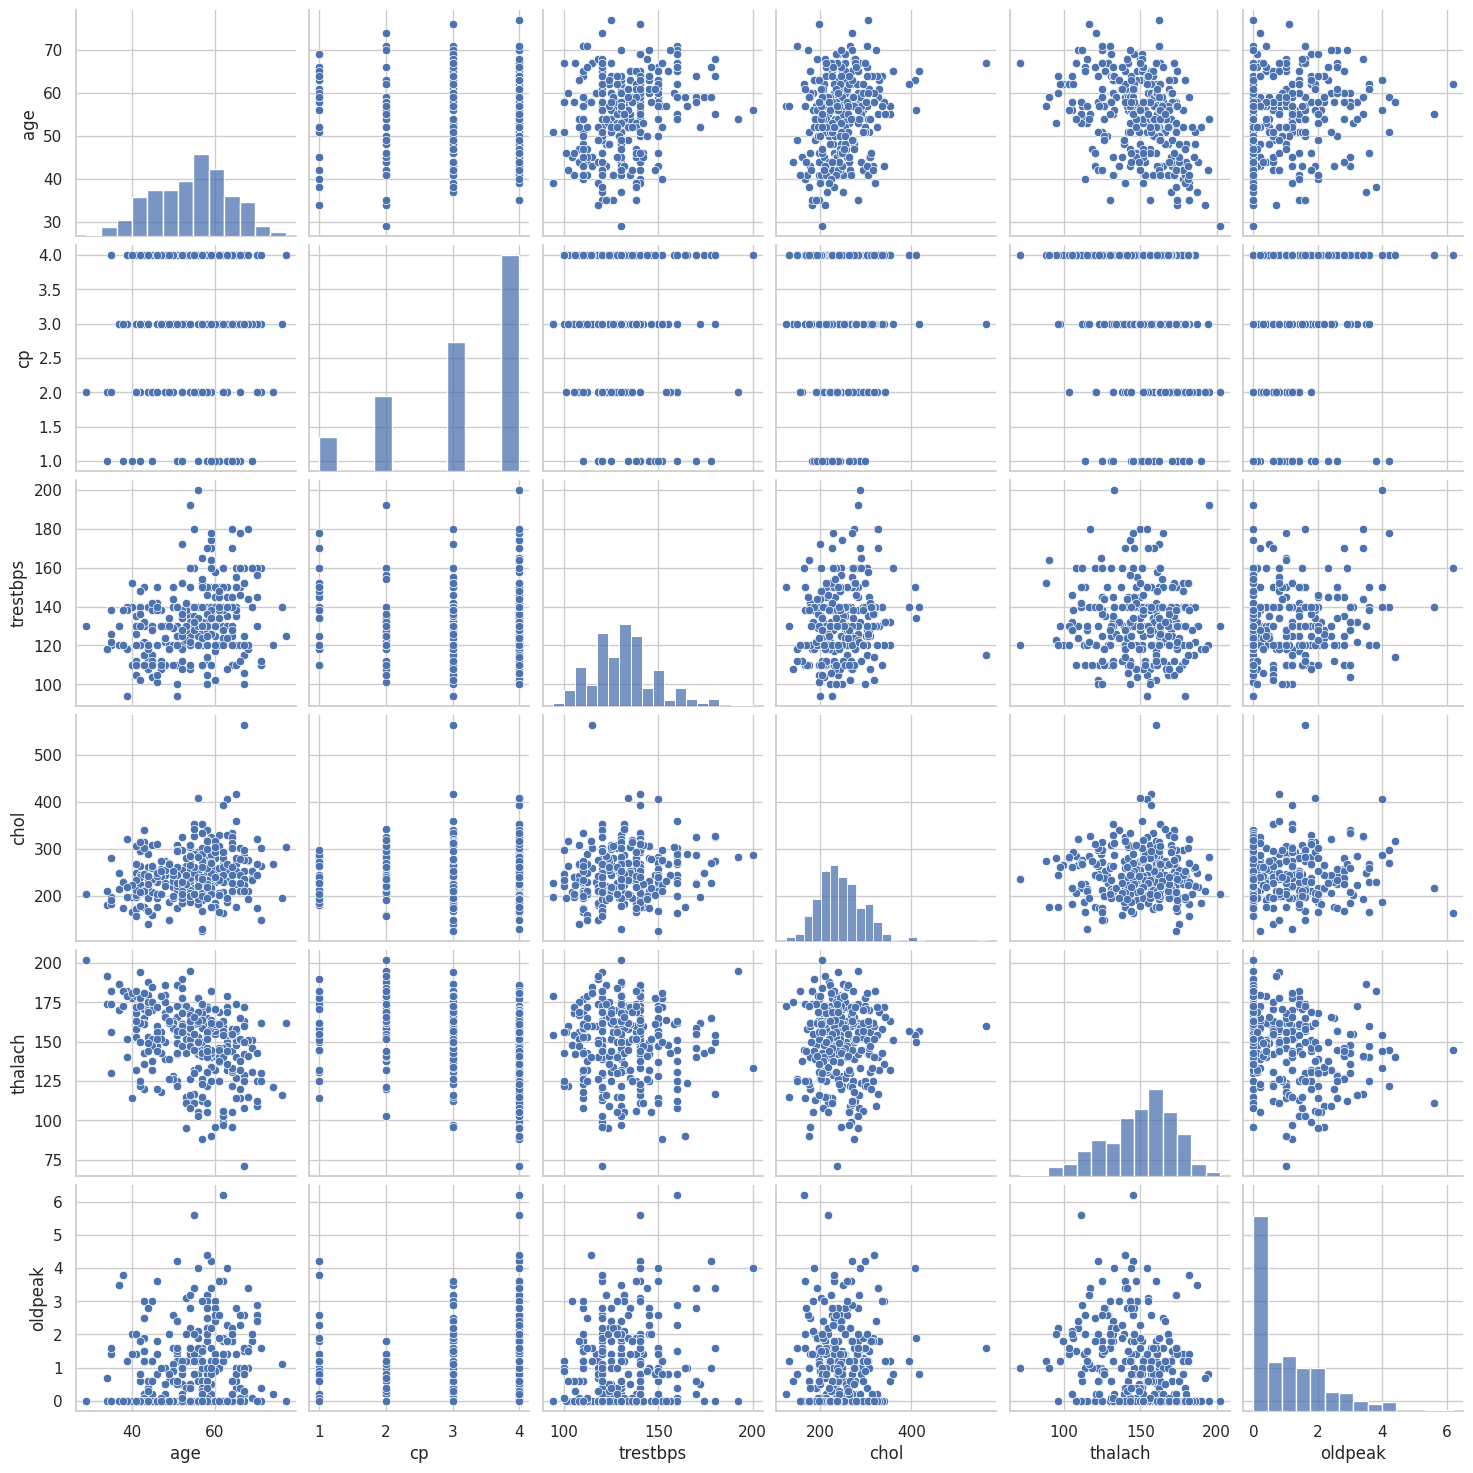

In [8]:
sns.set(style="whitegrid",context='notebook')
cols=['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak']
sns.pairplot(data[cols], height=2.5)
plt.show()

#Mapa de calor

<Axes: >

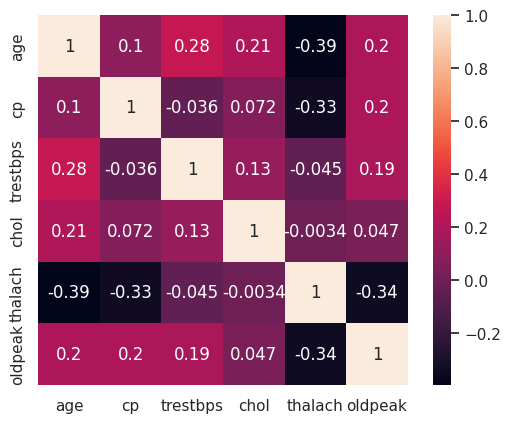

In [9]:
corr_matrix = data[cols].corr()
sns.set(font_scale=1)
sns.heatmap(corr_matrix, cbar=True, annot=True,square=True, yticklabels=cols, xticklabels=cols)


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [11]:
#Dandole dimensiones 
x= data['trestbps'].values.reshape(-1,1)
y= data['age'].values.reshape(-1,1)
#Normalizando
sc_x=StandardScaler()
sc_y=StandardScaler()
#Escalar la entrada y la salida
x_std=sc_x.fit_transform(x)
y_std=sc_y.fit_transform(y)


In [12]:
slr=LinearRegression()
slr.fit(x_std, y_std)

LinearRegression()

#Relacion entre dos variables

Text(0.5, 0, 'Presión arterial en reposo')

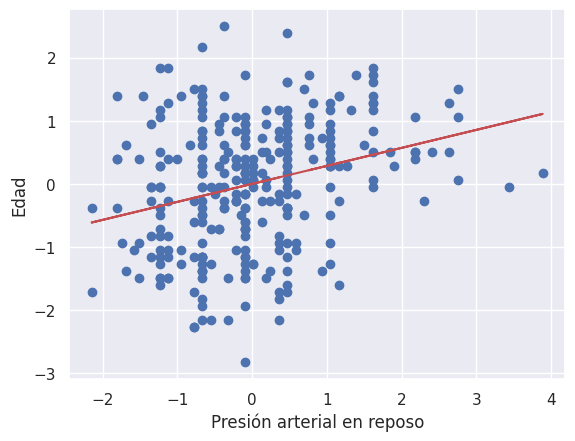

In [13]:
plt.scatter(x_std, y_std)
plt.plot(x_std, slr.predict(x_std), color='r')
plt.ylabel('Edad')
plt.xlabel('Presión arterial en reposo')

#Pequeña  prediccion

In [14]:
#Predicciones
Edad_Persona= 10
Edad_Persona_std= sc_y.transform(np.array([Edad_Persona]).reshape(-1,1))
Presion_Arterial_Predicha=slr.predict(Edad_Persona_std)
Presion_Arterial_Predicha_Original=sc_x.inverse_transform(Presion_Arterial_Predicha)
print("La presion arterial de una persona de ",Edad_Persona," años es de ", Presion_Arterial_Predicha_Original)

La presion arterial de una persona de  10  años es de  [[107.03343828]]


#Reemplazar datos nulos

In [15]:
#Empezar la red
#Acomodar los datos para su uso correcto
data=data.dropna()

data=data.replace('?', np.nan)
data=data.astype(float)
data=data.fillna(data.mean()) #Reemplazar los datos nulos con la media de la columna

In [16]:
data=data.reset_index(drop=True)
data['target'][data['target']>0]=1 
X=data.drop('target', axis=1)
Y=data['target'].values.reshape(-1,1)

In [17]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

#Dando dimensiones a la Red Neuronal

In [18]:
input_size = X_train.shape[1]
hidden_size_1 = 32
hidden_size_2 = 16
output_size = 1

W1=np.random.randn(input_size, hidden_size_1)
#filas#columnas
b1=np.zeros((1, hidden_size_1))
W2=np.random.randn(hidden_size_1,hidden_size_2)
b2=np.zeros((1,hidden_size_2))
W3=np.random.randn(hidden_size_2, output_size)
b3=np.zeros((1, output_size))


#Pesos

In [19]:
params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}

#Epocas y ratio de apredizaje

In [20]:
epochs=10000
learning_rate=0.0001
train_errors=[]
X_train_array=np.array(X_train.values, dtype=float)
output = train(X_train_array, Y_train, learning_rate, params, training=True)

<ipython-input-3-b93b5b198fbe>:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


#Entreno

In [21]:
for i in range(epochs):
  output = train(X_train.values, Y_train, learning_rate, params, training=True)
  train_error=mse(Y_train, output)
  train_errors.append(train_error)
if i%1000==0:
  print("Epoch:", i, "Train error:", train_error)

<ipython-input-3-b93b5b198fbe>:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


In [22]:
X_test_array = np.array(X_test.values, dtype=float)
# Obtener las predicciones
predictions = train(X_test_array, Y_test, learning_rate, params, training=False)

#Evaluar el error y accuracy

In [50]:
#Evaluación de la red neuronal
out_put = train(X_test.values, Y_test, learning_rate, params, training=False)
test_error = mse(Y_test, out_put)
print("Test error:", test_error)


# Calcular la precisión
correct_predictions = 0
total_predictions = len(Y_test)

for i in range(total_predictions):
    if Y_test[i] == predictions[i]:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions

# Graficar el accuracy
print("Accuracy: ", accuracy)


Test error: 0.4576023722650831
Accuracy:  0.01639344262295082


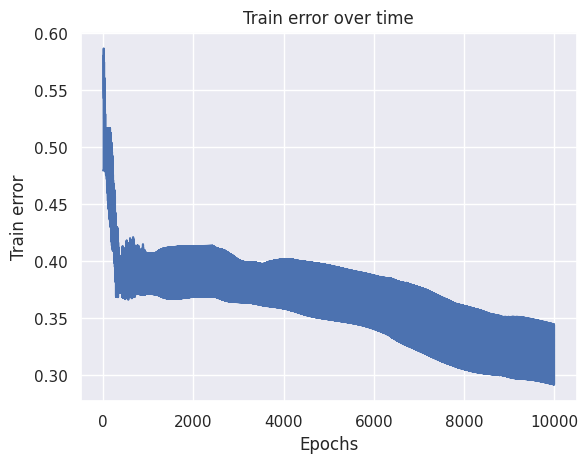

In [51]:
#Gráfico del error de entrenamiento

plt.plot(train_errors)
plt.title("Train error over time")
plt.xlabel("Epochs")
plt.ylabel("Train error")
plt.show()


#Predicciones

In [52]:
##Edad: 63
#Sexo: 1 (hombre)
#Tipo de dolor de pecho: 3 (dolor atípico)
#Presión arterial en reposo: 145
#Colesterol sérico en mg/dl: 233
#Azúcar en sangre en ayunas > 120 mg/dl: 1 (verdadero)
#Resultados electrocardiográficos en reposo: 0
#Frecuencia cardíaca máxima alcanzada: 150
#Ejercicio inducido angina: 0 (no)
#ST depression inducido por el ejercicio relativo al descanso: 2.3
#Pendiente del segmento ST de ejercicio pico: 0
#Número de vasos principales coloreados por flourosopía: 0
#Talasemia: 1

new_data = np.array([[99, 1, 3, 0, 233, 0, 0, 150, 0, 2.3, 0, 0, 1]])
output = train(new_data, np.array([]), learning_rate, params, training=False)
print("Output:", output)

Output: [[1.35771807e-135]]
